In [11]:
import oddt
import os
import re
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [12]:
dir_path = os.getcwd()
files_in_dir = [file for file in os.listdir() if '.sdf' in file and 'smiles' in file]

In [13]:
dict_of_res = {'vina_aff': [], 'rfscore_v2': [], 'rfscore_v3': [], 'nnscore': [], 'pleclinear': [], 'ic_50': [], 'id': [],
              'id': []}

for file in files_in_dir:
    with open(file, 'r') as f:
        f = f.read()
        dict_of_res['vina_aff'].append(min([float(val) for val in re.findall('<vina_affinity>\n(.*)', f)]))
        dict_of_res['rfscore_v2'].append(max([float(val) for val in re.findall('<rfscore_v2>\n(.*)', f)]))
        dict_of_res['rfscore_v3'].append(max([float(val) for val in re.findall('<rfscore_v3>\n(.*)', f)]))
        dict_of_res['nnscore'].append(max([float(val) for val in re.findall('<nnscore>\n(.*)', f)]))
        dict_of_res['pleclinear'].append(max([float(val) for val in re.findall('<PLEClinear_p5_l1_s65536>\n(.*)', f)]))
        dict_of_res['ic_50'].append(float(re.findall('CHEMBL\d*-(\S*)', f)[0]))
        dict_of_res['id'].append(re.findall('(CHEMBL\d*)-', f)[0])
        
with open('ligand.sdf', 'r') as f:
    f = f.read()
    dict_of_res['vina_aff'].append(min([float(val) for val in re.findall('<vina_affinity>\n(.*)', f)]))
    dict_of_res['rfscore_v2'].append(max([float(val) for val in re.findall('<rfscore_v2>\n(.*)', f)]))
    dict_of_res['rfscore_v3'].append(max([float(val) for val in re.findall('<rfscore_v3>\n(.*)', f)]))
    dict_of_res['nnscore'].append(max([float(val) for val in re.findall('<nnscore>\n(.*)', f)]))
    dict_of_res['pleclinear'].append(max([float(val) for val in re.findall('<PLEClinear_p5_l1_s65536>\n(.*)', f)]))
    dict_of_res['ic_50'].append(5.7)
    dict_of_res['id'].append('3fy1')

results_df = pd.DataFrame(dict_of_res)
print('Tabela z współczynnikami Pearsona i Spearmana dla wszystkich 22 związków \n + konformacji natywnej ze struktury krystalograficznej - metyloallosamidyny).')
results_df

Tabela z współczynnikami Pearsona i Spearmana dla wszystkich 22 związków 
 + konformacji natywnej ze struktury krystalograficznej - metyloallosamidyny).


,vina_aff,rfscore_v2,rfscore_v3,nnscore,pleclinear,ic_50,id
0,-10.151775,7.736223,7.439057,7.600952,6.001218,5.4,CHEMBL4077482
1,-8.626262,7.459089,7.507669,7.882168,4.824661,8.7,CHEMBL4068944
2,-10.231085,7.833500,7.514662,7.601779,8.662774,3.5,CHEMBL4077644
3,-7.773258,7.169005,7.336034,6.773978,6.622956,210.0,CHEMBL1215473
4,-8.122039,7.518774,7.562564,8.071840,3.761972,134.0,CHEMBL4075848
5,-8.667556,6.846931,6.375199,6.694567,2.777235,700.0,CHEMBL1215474
6,-8.108280,7.599007,7.544790,7.704528,3.953730,73.0,CHEMBL4098997
7,-7.974167,7.505961,7.303282,7.498999,3.867041,182.0,CHEMBL4072036
8,-8.353250,7.476481,7.111646,7.617745,3.136430,1545.0,CHEMBL4091907
9,-11.212200,7.690780,7.553102,7.681447,8.141074,3.4,CHEMBL4084573


,ic_50 & vina_aff,ic_50 & rfscore_v2,ic_50 & rfscore_v3,ic_50 & nnscore,ic_50 & pleclinear
pearson,0.429280,-0.213020,-0.191638,-0.452916,-0.225644
spearman,0.564369,-0.472449,-0.323697,-0.360267,-0.556956


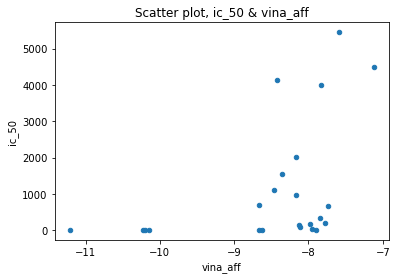

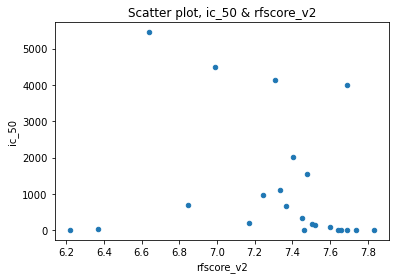

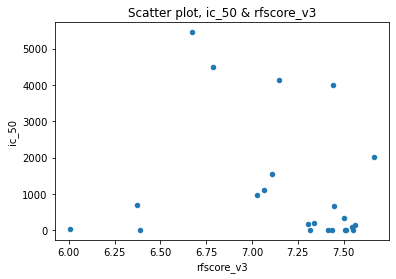

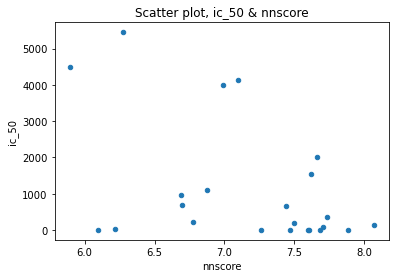

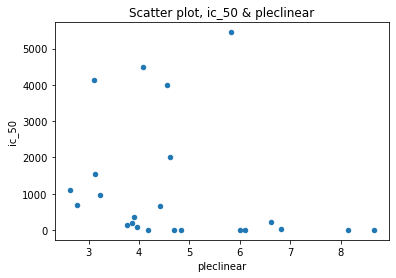

In [18]:
df_pear_spear = pd.DataFrame(index=['pearson', 'spearman'])
for key in dict_of_res.keys():
    if key not in ['ic_50', 'id']:
        corr, pval = pearsonr(results_df[key], results_df['ic_50'])
        corr_spear, pval_spear = spearmanr(results_df[key], results_df['ic_50'])
        df_pear_spear[f'ic_50 & {key}'] = [corr, corr_spear]
        results_df.plot.scatter(x = key, y = 'ic_50', title=f'Scatter plot, ic_50 & {key}')
df_pear_spear

**1. która funkcja oceny daje najlepszy współczynnik korelacji?**

Najlepszy współczynnik korelacji uzyskałem dla vina_affinity. Wyliczona korelacja spearmana pomiędzy wartościami IC50 i vina_affinity wynosi 0.56, a korealacja pearsona 0.43. Drugą najlepszą funkcją w kontekście wyników współczynników korelacji wydaje się być nnscore, a najgorszą rfscore_v3. Tutaj patrzę na wartości bezwzględne korelacji.

**2. Czy funkcje oceny oparte o uczenie maszynowe pomogły poprawić korelację naszego zestawu do parametryzacji?**

Porównując otrzymane teraz przeze mnie współczynniki korelacji z tymi otrzymanymi przy użyciu scorów z AutoDock Vina, można stwierdzić, iż funkcje oceny oparte o uczenie maszynowe poprawiły współczynniki korelacji. Współczynniki korelacji pomiędzy IC50, a scorami z AutoDock Vina, są porównywalne z najgorszą korelacą pomiędzy funkcją uczenia maszynowego (rfscore_v3) a IC50 - widać znaczną poprawę.

**3. Co można jeszcze zrobić aby poprawić naszą procedurę oceny?**

Aby poprawić naszą procedurę oceny, można spróbować wykorzystać którąś z bibliotek np. rdkit, przy pomocy, której
możnaby wygenerować fingerprinty. Najlepszym pomysłem wydaje się być użycie fingerprintsów PLEC (Protein-Ligand Extended Connectivity). Zastosowanie fingerprintsów PLEC pozwoliłoby na dostarczenie większej ilości informacji programu dokującemu niż zwykłe pliki SMILES. Wykorzystanie fingerprintsów dostarczyłoby więcej informacji funkcjom scorującym, co potencjalnie mogłoby zaowocować lepszymi współczynnikami korelacji.
